In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [6]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
columns = [col for col in df.columns]
nan_columns = [col for col in df.columns if df[col].isnull().any()] #columns with NaN values
print(nan_columns)

['Sleep Disorder']


In [8]:
current_distribution = df['Sleep Disorder'].value_counts()
print(current_distribution)

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [9]:
non_null_data = df['Sleep Disorder'].dropna() #dropping rows with NaN values
nan_count = df['Sleep Disorder'].isnull().sum() #counting NaN values
print(f'Number of NaN values in "Sleep Disorder" column: {nan_count}')
print(non_null_data.value_counts())

Number of NaN values in "Sleep Disorder" column: 219
Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [11]:
df.isnull().sum() / df.shape[0] * 100

Person ID                   0.00000
Gender                      0.00000
Age                         0.00000
Occupation                  0.00000
Sleep Duration              0.00000
Quality of Sleep            0.00000
Physical Activity Level     0.00000
Stress Level                0.00000
BMI Category                0.00000
Blood Pressure              0.00000
Heart Rate                  0.00000
Daily Steps                 0.00000
Sleep Disorder             58.55615
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


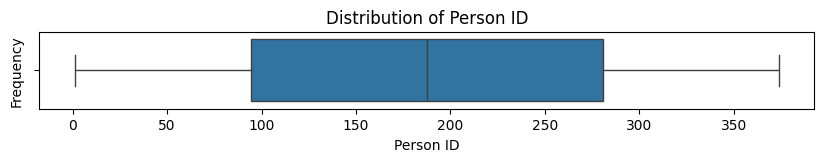

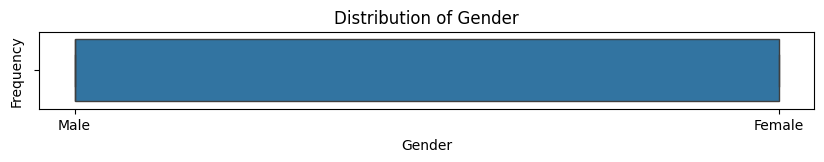

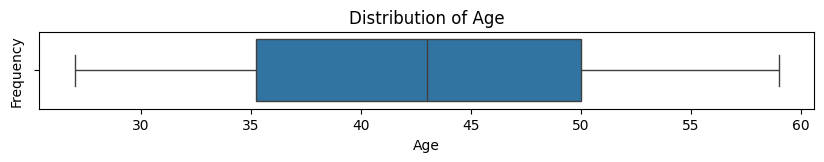

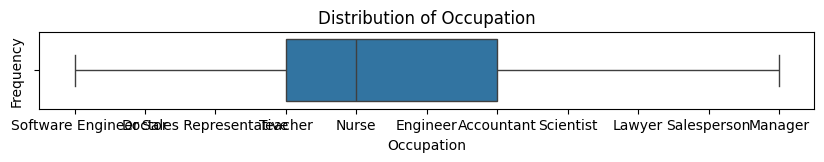

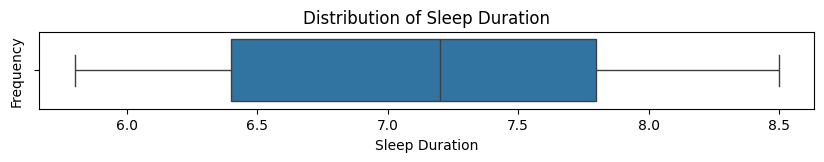

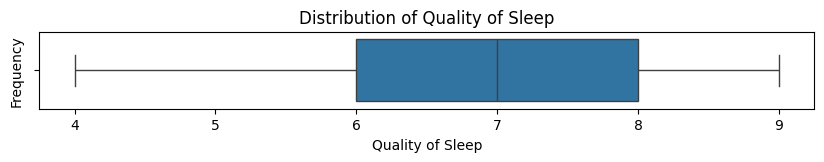

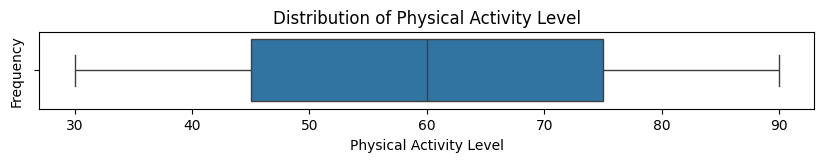

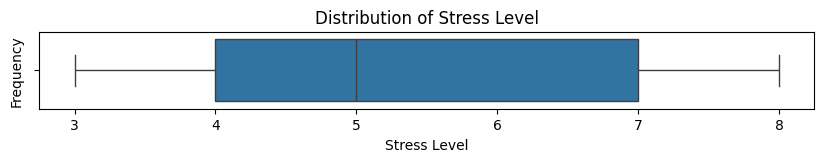

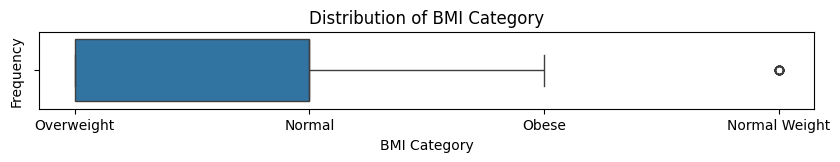

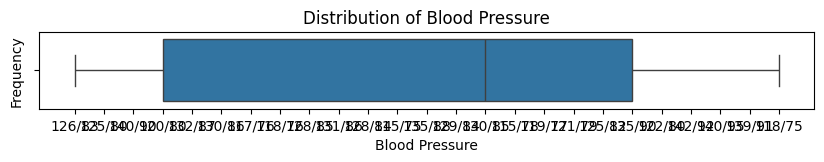

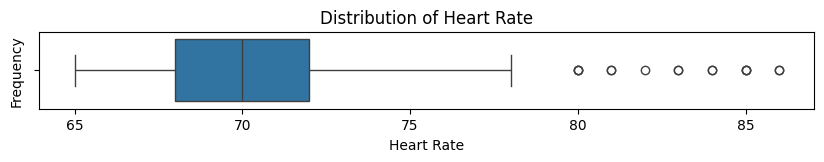

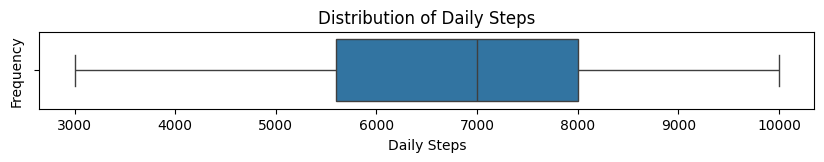

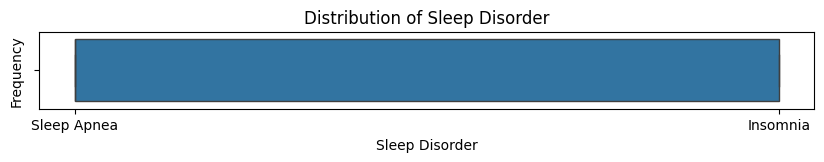

In [13]:
for colunm in df.columns:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=df, x=colunm)
    plt.title(f'Distribution of {colunm}')  
    plt.xlabel(colunm)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['number']).columns 
print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')
Numerical Columns: Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')


In [15]:
df[cat_cols].nunique()


Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     2
dtype: int64

In [16]:
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder: [nan 'Sleep Apnea' 'Insomnia']


In [17]:
df[num_cols].nunique()


Person ID                  374
Age                         31
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
Heart Rate                  19
Daily Steps                 20
dtype: int64

In [18]:
for col in num_cols[1:]:
    print(f"{col}: {df[col].unique()}")

Age: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Sleep Duration: [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Quality of Sleep: [6 4 7 5 8 9]
Physical Activity Level: [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Stress Level: [6 8 7 4 3 5]
Heart Rate: [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]
Daily Steps: [ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800  7500  7300  6200  6000  3700]


In [19]:
df = df.drop(columns=['Person ID']) #Dropping Person ID as it is not useful for analysis
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [20]:
# Fill missing Sleep Disorder (optional: can be 0 or 'No Disorder')
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(0)

# Split Blood Pressure correctly
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['BP_Systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
df['BP_Diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')

# Drop the original column
df = df.drop(columns=['Blood Pressure'])


In [21]:
df.head(20)


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP_Systolic,BP_Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,0,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,0,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,0,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
5,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90
6,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90
7,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,0,120,80
8,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,0,120,80
9,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,0,120,80


In [22]:
df_processed = pd.get_dummies(df, columns=['Sleep Disorder'], drop_first=True)
df_processed.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BP_Systolic,BP_Diastolic,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83,False,False
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,False,False
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,False,False
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,False,True
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,False,True


In [23]:
df_processed = pd.get_dummies(df_processed, columns=['Occupation','BMI Category','Gender'],drop_first=True)
df_processed.head()
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    int64  
 1   Sleep Duration                   374 non-null    float64
 2   Quality of Sleep                 374 non-null    int64  
 3   Physical Activity Level          374 non-null    int64  
 4   Stress Level                     374 non-null    int64  
 5   Heart Rate                       374 non-null    int64  
 6   Daily Steps                      374 non-null    int64  
 7   BP_Systolic                      374 non-null    int64  
 8   BP_Diastolic                     374 non-null    int64  
 9   Sleep Disorder_Insomnia          374 non-null    bool   
 10  Sleep Disorder_Sleep Apnea       374 non-null    bool   
 11  Occupation_Doctor                374 non-null    bool   
 12  Occupation_Engineer   

In [24]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    int64  
 1   Sleep Duration                   374 non-null    float64
 2   Quality of Sleep                 374 non-null    int64  
 3   Physical Activity Level          374 non-null    int64  
 4   Stress Level                     374 non-null    int64  
 5   Heart Rate                       374 non-null    int64  
 6   Daily Steps                      374 non-null    int64  
 7   BP_Systolic                      374 non-null    int64  
 8   BP_Diastolic                     374 non-null    int64  
 9   Sleep Disorder_Insomnia          374 non-null    bool   
 10  Sleep Disorder_Sleep Apnea       374 non-null    bool   
 11  Occupation_Doctor                374 non-null    bool   
 12  Occupation_Engineer   

In [25]:
# make all the headings lowercase and replace spaces with underscores
df_processed.columns = [col.lower().replace(' ', '_') for col in df_processed.columns]
df_processed.head()

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps,bp_systolic,bp_diastolic,sleep_disorder_insomnia,...,occupation_nurse,occupation_sales_representative,occupation_salesperson,occupation_scientist,occupation_software_engineer,occupation_teacher,bmi_category_normal_weight,bmi_category_obese,bmi_category_overweight,gender_male
0,27,6.1,6,42,6,77,4200,126,83,False,...,False,False,False,False,True,False,False,False,True,True
1,28,6.2,6,60,8,75,10000,125,80,False,...,False,False,False,False,False,False,False,False,False,True
2,28,6.2,6,60,8,75,10000,125,80,False,...,False,False,False,False,False,False,False,False,False,True
3,28,5.9,4,30,8,85,3000,140,90,False,...,False,True,False,False,False,False,False,True,False,True
4,28,5.9,4,30,8,85,3000,140,90,False,...,False,True,False,False,False,False,False,True,False,True


In [26]:
for  item in df_processed['bp_diastolic']:
    print(item)

83
80
80
90
90
90
90
80
80
80
80
80
80
80
80
80
87
80
87
80
80
80
80
80
80
80
80
80
80
80
86
86
76
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
76
80
85
85
80
80
80
80
80
80
80
80
80
80
86
86
84
84
80
75
80
80
80
80
80
80
80
88
75
75
75
75
75
75
75
75
75
84
75
84
83
80
80
85
75
85
75
85
75
75
75
75
75
75
75
75
75
75
75
80
85
75
85
85
75
85
85
75
85
85
75
85
75
85
75
85
75
75
85
88
85
87
85
78
78
85
85
85
85
85
85
85
85
85
85
77
77
85
85
85
79
82
82
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
90
85
90
85
90
85
85
85
85
85
85
85
85
85
85
85
85
76
80
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
90
85
85
85
90
85
90
85
90
85
90
85
90
85
90
85
85
90
85
85
90
85
85
90
85
90
85
85
85
85
90
90
90
90
90
90
90
90
90
90
90
90
90
82
92
95
92
95
95
95
95
95
95
95
95
95
91
91
95
80
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
80
80
80
80
82
95
95
95
85
85
85
85
85
85
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
8

In [27]:
#Convert the seperated BP parts's value to integers
df_processed['bp_diastolic'] = pd.to_numeric(df_processed['bp_diastolic'],errors='coerce')
df_processed['bp_systolic'] = pd.to_numeric(df_processed['bp_systolic'],errors='coerce')
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              374 non-null    int64  
 1   sleep_duration                   374 non-null    float64
 2   quality_of_sleep                 374 non-null    int64  
 3   physical_activity_level          374 non-null    int64  
 4   stress_level                     374 non-null    int64  
 5   heart_rate                       374 non-null    int64  
 6   daily_steps                      374 non-null    int64  
 7   bp_systolic                      374 non-null    int64  
 8   bp_diastolic                     374 non-null    int64  
 9   sleep_disorder_insomnia          374 non-null    bool   
 10  sleep_disorder_sleep_apnea       374 non-null    bool   
 11  occupation_doctor                374 non-null    bool   
 12  occupation_engineer   

In [28]:
df_processed.columns

Index(['age', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level',
       'stress_level', 'heart_rate', 'daily_steps', 'bp_systolic',
       'bp_diastolic', 'sleep_disorder_insomnia', 'sleep_disorder_sleep_apnea',
       'occupation_doctor', 'occupation_engineer', 'occupation_lawyer',
       'occupation_manager', 'occupation_nurse',
       'occupation_sales_representative', 'occupation_salesperson',
       'occupation_scientist', 'occupation_software_engineer',
       'occupation_teacher', 'bmi_category_normal_weight',
       'bmi_category_obese', 'bmi_category_overweight', 'gender_male'],
      dtype='object')

                              age  sleep_duration  quality_of_sleep  \
age                      1.000000        0.344709          0.473734   
sleep_duration           0.344709        1.000000          0.883213   
quality_of_sleep         0.473734        0.883213          1.000000   
physical_activity_level  0.178993        0.212360          0.192896   
stress_level            -0.422344       -0.811023         -0.898752   

                         physical_activity_level  stress_level  heart_rate  \
age                                     0.178993     -0.422344   -0.225606   
sleep_duration                          0.212360     -0.811023   -0.516455   
quality_of_sleep                        0.192896     -0.898752   -0.659865   
physical_activity_level                 1.000000     -0.034134    0.136971   
stress_level                           -0.034134      1.000000    0.670026   

                         daily_steps  bp_systolic  bp_diastolic  \
age                         0.057973 

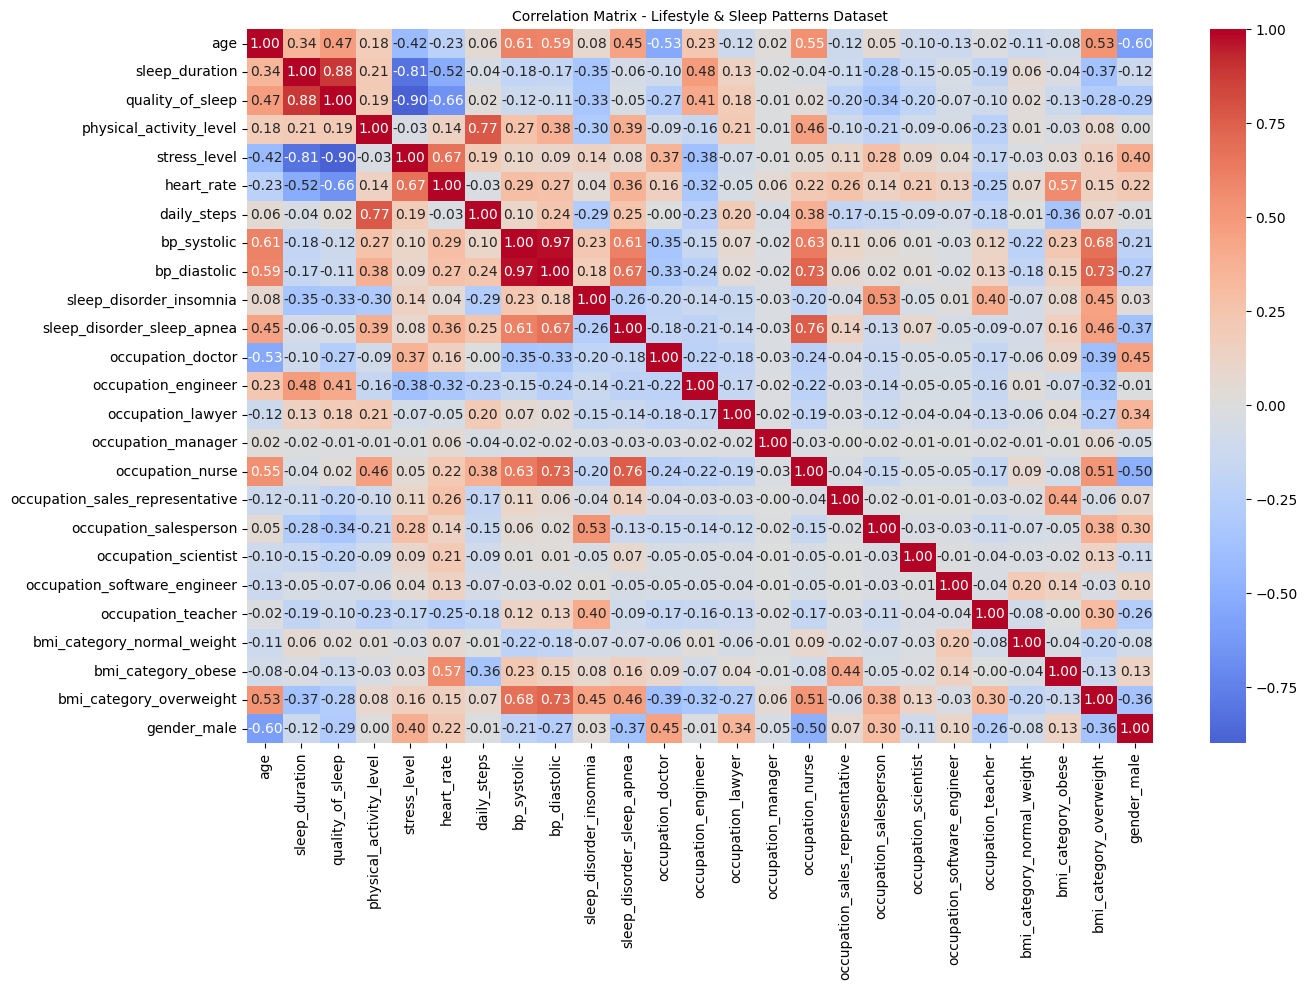

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df_processed.corr() 

print(corr_matrix.head())

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,          # set True to show values
    cmap='coolwarm',      # diverging color map
    center=0,
    fmt=".2f"
)
plt.title("Correlation Matrix - Lifestyle & Sleep Patterns Dataset", fontsize=10)
plt.tight_layout()
plt.show()

In [30]:

stress_level = abs(corr_matrix)['stress_level'].sort_values(ascending=False)
print(stress_level[1:])

quality_of_sleep                   0.898752
sleep_duration                     0.811023
heart_rate                         0.670026
age                                0.422344
gender_male                        0.396018
occupation_engineer                0.379980
occupation_doctor                  0.368038
occupation_salesperson             0.278757
daily_steps                        0.186829
occupation_teacher                 0.167945
bmi_category_overweight            0.157406
sleep_disorder_insomnia            0.139380
occupation_sales_representative    0.108196
bp_systolic                        0.102818
occupation_scientist               0.094753
bp_diastolic                       0.091811
sleep_disorder_sleep_apnea         0.081582
occupation_lawyer                  0.068714
occupation_nurse                   0.045274
occupation_software_engineer       0.036081
physical_activity_level            0.034134
bmi_category_obese                 0.029459
bmi_category_normal_weight      

In [31]:
X = df_processed.drop(columns=['stress_level'])
y = df_processed['stress_level']

In [33]:
X.head()

,age,sleep_duration,quality_of_sleep,physical_activity_level,heart_rate,daily_steps,bp_systolic,bp_diastolic,sleep_disorder_insomnia,sleep_disorder_sleep_apnea,...,occupation_nurse,occupation_sales_representative,occupation_salesperson,occupation_scientist,occupation_software_engineer,occupation_teacher,bmi_category_normal_weight,bmi_category_obese,bmi_category_overweight,gender_male
0,27,6.1,6,42,77,4200,126,83,False,False,...,False,False,False,False,True,False,False,False,True,True
1,28,6.2,6,60,75,10000,125,80,False,False,...,False,False,False,False,False,False,False,False,False,True
2,28,6.2,6,60,75,10000,125,80,False,False,...,False,False,False,False,False,False,False,False,False,True
3,28,5.9,4,30,85,3000,140,90,False,True,...,False,True,False,False,False,False,False,True,False,True
4,28,5.9,4,30,85,3000,140,90,False,True,...,False,True,False,False,False,False,False,True,False,True


In [34]:
y.head()

0    6
1    8
2    8
3    8
4    8
Name: stress_level, dtype: int64

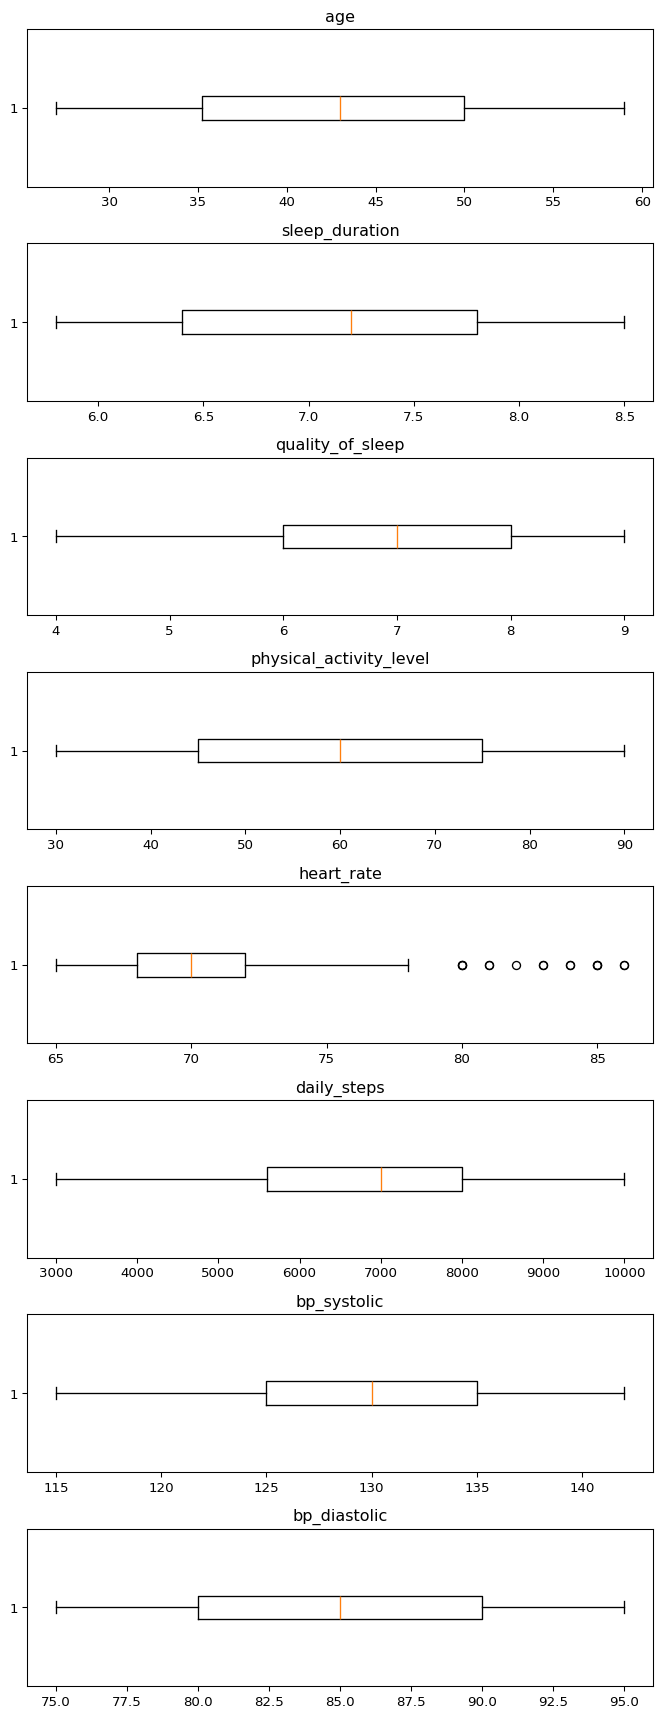

In [36]:
import matplotlib.pyplot as plt

num_columns = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

fig,ax = plt.subplots(len(num_columns), 1, figsize=(7,18),dpi=96 )
for i, col in enumerate(num_columns):
    ax[i].boxplot(df_processed[col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #initialize the scaler
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_normalized = X.copy()
X_normalized[numerical_cols] = scaler.fit_transform(X[numerical_cols])
X_normalized.head()


,age,sleep_duration,quality_of_sleep,physical_activity_level,heart_rate,daily_steps,bp_systolic,bp_diastolic,sleep_disorder_insomnia,sleep_disorder_sleep_apnea,...,occupation_nurse,occupation_sales_representative,occupation_salesperson,occupation_scientist,occupation_software_engineer,occupation_teacher,bmi_category_normal_weight,bmi_category_obese,bmi_category_overweight,gender_male
0,-1.753096,-1.298887,-1.098280,-0.825418,1.654719,-1.619584,-0.330002,-0.268102,False,False,...,False,False,False,False,True,False,False,False,True,True
1,-1.637643,-1.173036,-1.098280,0.039844,1.170474,1.970077,-0.459239,-0.755640,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-1.637643,-1.173036,-1.098280,0.039844,1.170474,1.970077,-0.459239,-0.755640,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-1.637643,-1.550588,-2.771424,-1.402260,3.591698,-2.362273,1.479309,0.869486,False,True,...,False,True,False,False,False,False,False,True,False,True
4,-1.637643,-1.550588,-2.771424,-1.402260,3.591698,-2.362273,1.479309,0.869486,False,True,...,False,True,False,False,False,False,False,True,False,True


In [39]:
# Create a classification model using Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  1 12  1  0  0]
 [ 0  1  0  8  1  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  1 16]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.83      1.00      0.91        10
           5       1.00      0.86      0.92        14
           6       0.89      0.80      0.84        10
           7       0.86      1.00      0.92        12
           8       1.00      0.94      0.97        17

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



In [40]:
# create a categorical classification model using Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 12  2  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  1  0 16]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10
           5       1.00      0.86      0.92        14
           6       0.77      1.00      0.87        10
           7       1.00      1.00      1.00        12
           8       1.00      0.94      0.97        17

    accuracy                           0.96        75
   macro avg       0.96      0.97      0.96        75
weighted avg       0.97      0.96      0.96        75

